In [1]:
import numpy as np
import cv2
from skimage import measure
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from pylab import imread, imshow, gray, mean
from matplotlib import cm

def to_find_angle_function(img,i):
    image = np.mean(img,axis=2)
    image = (image < 128)*255
    h, theta, d = hough_line(image)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6),subplot_kw={'adjustable': 'box'})
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    
    ax[1].imshow(image, cmap=cm.gray)
    for _,angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines in image :'+str(i))
         

    plt.tight_layout()
    plt.show()

    angle=[]
    dist=[]
    for _, a , d in zip(*hough_line_peaks(h, theta, d)):
        angle.append(a)
        dist.append(d)

    angle = [a*180/np.pi for a in angle]
    angle_reel = np.max(angle) - np.min(angle)
    x = angle_reel - 100
    x = round(x)
    if x < 0:
        x = 90
    print(x)
    return x

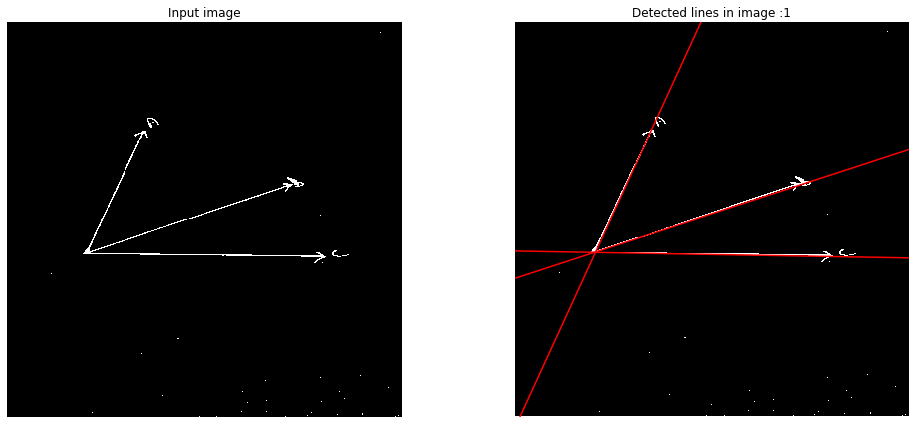

61.0


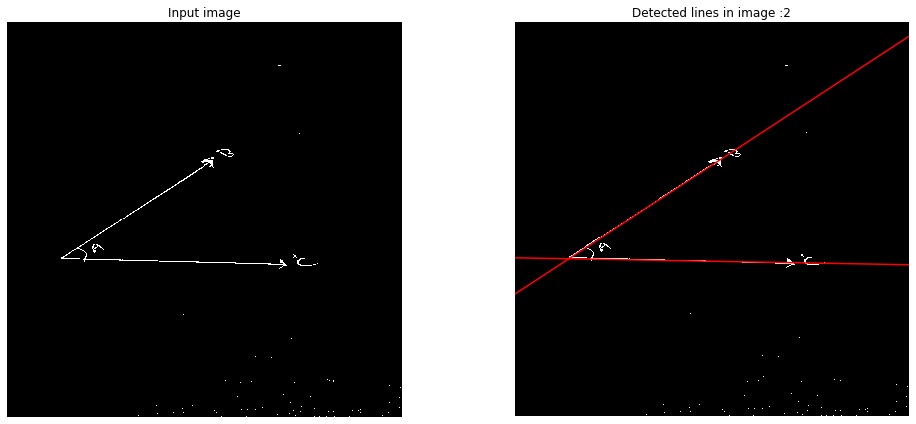

46.0


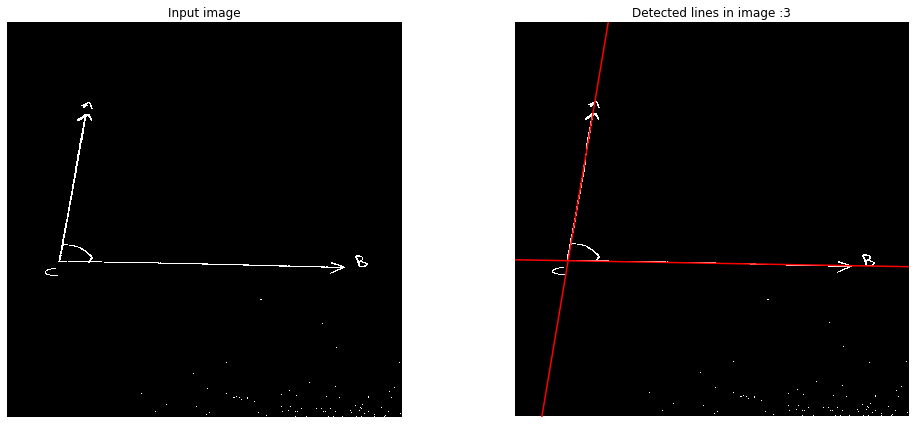

90


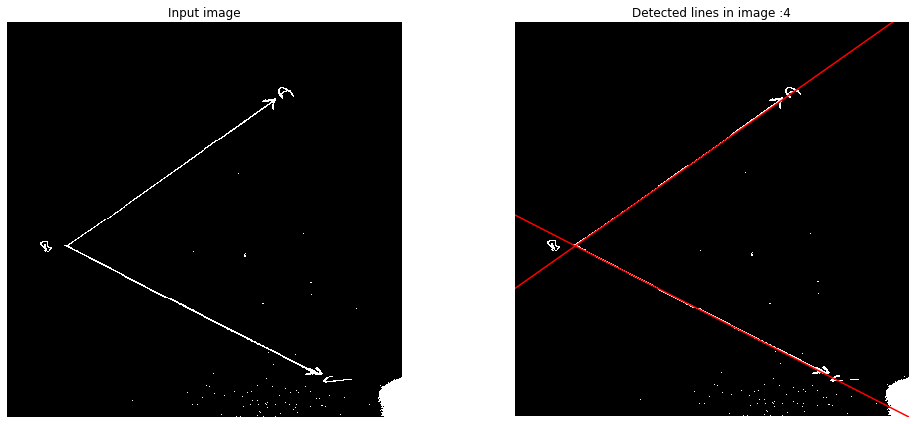

18.0


In [2]:
reshape= (400,400)
inner_degress = {}
outer_degress ={}
image_path = 'C:\\Users\\hem\\Desktop\\ass'
i = 1
import os
for filename in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path,filename))
    img =cv2.resize(img,reshape)
    x = to_find_angle_function(img,i)
    s = 'detected inner angle in image' + str(i)
    inner_degress[s]=x     
    s1 ='detected outer angle in image' + str(i)
    outer_degress[s]=180-x                                       #calculating for the outer degree
    i = i+1

In [3]:
inner_degress

{'detected inner angle in image1': 61.0,
 'detected inner angle in image2': 46.0,
 'detected inner angle in image3': 90,
 'detected inner angle in image4': 18.0}

In [4]:
outer_degress

{'detected inner angle in image1': 119.0,
 'detected inner angle in image2': 134.0,
 'detected inner angle in image3': 90,
 'detected inner angle in image4': 162.0}

# finding multiple angle in an image

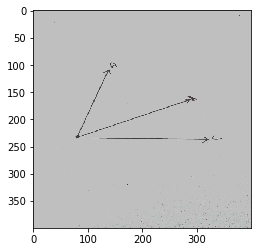

In [5]:
multi_angle_image = cv2.imread('C:\\Users\\hem\\Desktop\\ass\\ass1.jpg')
x = cv2.resize(multi_angle_image,reshape)
plt.imshow(x)

Text(0.5, 1.0, 'Detected lines in image :5')

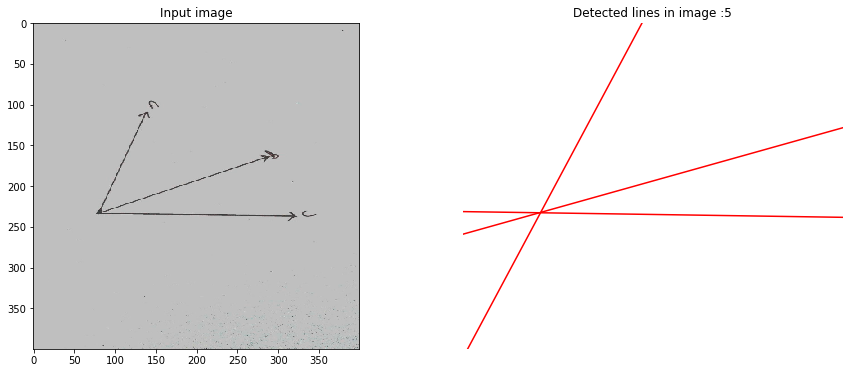

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15, 6),subplot_kw={'adjustable': 'box'})
ax = axes.ravel()
ax[0].imshow(x, cmap=cm.gray)
ax[0].set_title('Input image')
image = np.mean(x,axis=2)
image = (image < 128)*255
h, theta, d = hough_line(image)
coordinates =[]
for _,ang, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(ang)) / np.sin(ang)
    y1 = (dist - image.shape[1] * np.cos(ang)) / np.sin(ang)
    ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
    coordinates.append(ang)
    
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines in image :'+str(i))

# at final implementing the degree from the required coordinates

In [16]:

degree ={}
for i in range(0,len(coordinates)):
    a= coordinates[i]*180/np.pi 
    if a <0: 
        x = abs(a)
        s = 'detected angle ' + str(i+1) + ' in image'
        degree[s]=x
        
    else:
        s = 'detected angle ' + str(i+1) + ' in image'
        degree[s]=a

In [17]:
degree

{'detected angle 1 in image': 88.99441340782121,
 'detected angle 2 in image': 71.89944134078212,
 'detected angle 3 in image': 24.636871508379873}